In [ ]:
pip install plotly-express

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import re
import string
#from wordcloud import WordCloud
from wordcloud import WordCloud, STOPWORDS


import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
nltk.download('stopwords')
nltk.download('vader_lexicon')

from collections import Counter

from matplotlib import ticker
import seaborn as sns
import plotly.express as px

sns.set(style="darkgrid")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
df = pd.read_csv('covid19_tweets.csv')
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624.0,950.0,18775.0,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253.0,1677.0,24.0,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275.0,9525.0,7254.0,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197.0,987.0,1488.0,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009.0,168.0,101.0,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [ ]:
df.shape

(41133, 13)

In [ ]:
req_cols = ['user_name', 'date', 'text']
df = df[req_cols]
df.head()

,user_name,date,text
0,ᏉᎥ☻լꂅϮ,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...
1,Tom Basile 🇺🇸,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2,Time4fisticuffs,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...
3,ethel mertz,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...
4,DIPR-J&K,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...


In [ ]:
df.user_name = df.user_name.astype('category')
df.user_name = df.user_name.cat.codes

df.date = pd.to_datetime(df.date).dt.date
df.head()

,user_name,date,text
0,24607,2020-07-25,If I smelled the scent of hand sanitizers toda...
1,20837,2020-07-25,Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2,20775,2020-07-25,@diane3443 @wdunlap @realDonaldTrump Trump nev...
3,23121,2020-07-25,@brookbanktv The one gift #COVID19 has give me...
4,4936,2020-07-25,25 July : Media Bulletin on Novel #CoronaVirus...


In [ ]:
texts = df['text']
texts

0        If I smelled the scent of hand sanitizers toda...
1        Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2        @diane3443 @wdunlap @realDonaldTrump Trump nev...
3        @brookbanktv The one gift #COVID19 has give me...
4        25 July : Media Bulletin on Novel #CoronaVirus...
                               ...                        
41128    WE were not "slow to recognize #coronavirus th...
41129    For 6 weeks, you'll be ready for the overseas ...
41130    @BernieSanders @BenJealous How many small busi...
41131    @WearePAHA @lisamurkowski It’s a country wide ...
41132                                                  NaN
Name: text, Length: 41133, dtype: object

In [ ]:
remove_url = lambda x: re.sub('https\S+', '', str(x))
texts_lr = texts.apply(remove_url)
texts_lr

0        If I smelled the scent of hand sanitizers toda...
1        Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2        @diane3443 @wdunlap @realDonaldTrump Trump nev...
3        @brookbanktv The one gift #COVID19 has give me...
4        25 July : Media Bulletin on Novel #CoronaVirus...
                               ...                        
41128    WE were not "slow to recognize #coronavirus th...
41129    For 6 weeks, you'll be ready for the overseas ...
41130    @BernieSanders @BenJealous How many small busi...
41131    @WearePAHA @lisamurkowski It’s a country wide ...
41132                                                  nan
Name: text, Length: 41133, dtype: object

In [ ]:
to_lower = lambda x: x.lower()
texts_lr_lc = texts_lr.apply(to_lower)
texts_lr_lc

0        if i smelled the scent of hand sanitizers toda...
1        hey @yankees @yankeespr and @mlb - wouldn't it...
2        @diane3443 @wdunlap @realdonaldtrump trump nev...
3        @brookbanktv the one gift #covid19 has give me...
4        25 july : media bulletin on novel #coronavirus...
                               ...                        
41128    we were not "slow to recognize #coronavirus th...
41129    for 6 weeks, you'll be ready for the overseas ...
41130    @berniesanders @benjealous how many small busi...
41131    @wearepaha @lisamurkowski it’s a country wide ...
41132                                                  nan
Name: text, Length: 41133, dtype: object

In [ ]:
remove_punc = lambda x: x.translate(str.maketrans('', '', string.punctuation))
texts_lr_lc_np = texts_lr_lc.apply(remove_punc)
texts_lr_lc_np

0        if i smelled the scent of hand sanitizers toda...
1        hey yankees yankeespr and mlb  wouldnt it have...
2        diane3443 wdunlap realdonaldtrump trump never ...
3        brookbanktv the one gift covid19 has give me i...
4        25 july  media bulletin on novel coronavirusup...
                               ...                        
41128    we were not slow to recognize coronavirus thre...
41129    for 6 weeks youll be ready for the overseas jo...
41130    berniesanders benjealous how many small busine...
41131    wearepaha lisamurkowski it’s a country wide pr...
41132                                                  nan
Name: text, Length: 41133, dtype: object

In [ ]:
more_words = ['covid', '#coronavirus', '#coronavirusoutbreak', '#coronovirusPandemic', '#covid19', '#epitwitter', '#ihavecorona', 'coronavirus', 'covid19']
stop_words = set(stopwords.words('english'))
stop_words.update(more_words)

remove_words = lambda x:' '.join([word for word in x.split() if word not in stop_words])
texts_lr_lc_np_ns = texts_lr_lc_np.apply(remove_words)
texts_lr_lc_np_ns

0        smelled scent hand sanitizers today someone pa...
1        hey yankees yankeespr mlb wouldnt made sense p...
2        diane3443 wdunlap realdonaldtrump trump never ...
3        brookbanktv one gift give appreciation simple ...
4        25 july media bulletin novel coronavirusupdate...
                               ...                        
41128    slow recognize threat europe realdonaldtrump q...
41129    6 weeks youll ready overseas journeyenroll 1st...
41130    berniesanders benjealous many small businesses...
41131    wearepaha lisamurkowski it’s country wide prob...
41132                                                  nan
Name: text, Length: 41133, dtype: object

In [ ]:
word_list = [word for line in texts_lr_lc_np_ns for word in line.split()]
word_list

['smelled',
 'scent',
 'hand',
 'sanitizers',
 'today',
 'someone',
 'past',
 'would',
 'think',
 'intoxicated',
 'that…',
 'hey',
 'yankees',
 'yankeespr',
 'mlb',
 'wouldnt',
 'made',
 'sense',
 'players',
 'pay',
 'respects',
 'a…',
 'diane3443',
 'wdunlap',
 'realdonaldtrump',
 'trump',
 'never',
 'claimed',
 'hoax',
 'claim',
 'effort',
 'to…',
 'brookbanktv',
 'one',
 'gift',
 'give',
 'appreciation',
 'simple',
 'things',
 'always',
 'around',
 'me…',
 '25',
 'july',
 'media',
 'bulletin',
 'novel',
 'coronavirusupdates',
 'kansalrohit69',
 'drsyedsehrish',
 'airnewsalerts',
 'ani…',
 'deaths',
 'continue',
 'rise',
 'almost',
 'bad',
 'ever',
 'politicians',
 'businesses',
 'want…',
 'change',
 'work',
 'general',
 'recruiting',
 'specifically',
 'via',
 'proactivetalent',
 'recruiting…',
 'wear',
 'face',
 'coverings',
 'shopping',
 'includes',
 'visit',
 'local',
 'community',
 'pharmacy…',
 'praying',
 'good',
 'health',
 'recovery',
 'chouhanshivraj',
 'covidpositive',
 'po

In [ ]:
word_counts = Counter(word_list).most_common(50)
word_counts

words_df = pd.DataFrame(word_counts)
words_df.columns=['words', 'frequency']

px.bar(words_df, x='words', y='frequency', title = 'Most common words')

In [ ]:
df.text = texts_lr_lc_np_ns
df.head()

,user_name,date,text
0,24607,2020-07-25,smelled scent hand sanitizers today someone pa...
1,20837,2020-07-25,hey yankees yankeespr mlb wouldnt made sense p...
2,20775,2020-07-25,diane3443 wdunlap realdonaldtrump trump never ...
3,23121,2020-07-25,brookbanktv one gift give appreciation simple ...
4,4936,2020-07-25,25 july media bulletin novel coronavirusupdate...


In [ ]:
sid = SentimentIntensityAnalyzer()
ps = lambda x: sid.polarity_scores(x)
sentiment_score = df.text.apply(ps)
sentiment_score

0        {'neg': 0.0, 'neu': 0.758, 'pos': 0.242, 'comp...
1        {'neg': 0.11, 'neu': 0.709, 'pos': 0.181, 'com...
2        {'neg': 0.0, 'neu': 0.832, 'pos': 0.168, 'comp...
3        {'neg': 0.0, 'neu': 0.563, 'pos': 0.437, 'comp...
4        {'neg': 0.0, 'neu': 0.796, 'pos': 0.204, 'comp...
                               ...                        
41128    {'neg': 0.496, 'neu': 0.504, 'pos': 0.0, 'comp...
41129    {'neg': 0.0, 'neu': 0.762, 'pos': 0.238, 'comp...
41130    {'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'comp...
41131    {'neg': 0.127, 'neu': 0.472, 'pos': 0.401, 'co...
41132    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: text, Length: 41133, dtype: object

In [ ]:
sentiment_df = pd.DataFrame(data = list(sentiment_score))
sentiment_df.head()

,neg,neu,pos,compound
0,0.00,0.758,0.242,0.4939
1,0.11,0.709,0.181,0.2263
2,0.00,0.832,0.168,0.2057
3,0.00,0.563,0.437,0.7351
4,0.00,0.796,0.204,0.3182


In [ ]:
labelise = lambda x: 'neutral' if x==0 else('positive' if x>0 else 'negative')
sentiment_df['label'] = sentiment_df.compound.apply(labelise)
sentiment_df.head()

,neg,neu,pos,compound,label
0,0.00,0.758,0.242,0.4939,positive
1,0.11,0.709,0.181,0.2263,positive
2,0.00,0.832,0.168,0.2057,positive
3,0.00,0.563,0.437,0.7351,positive
4,0.00,0.796,0.204,0.3182,positive


In [ ]:
data = df.join(sentiment_df.label)
data

,user_name,date,text,label
0,24607,2020-07-25,smelled scent hand sanitizers today someone pa...,positive
1,20837,2020-07-25,hey yankees yankeespr mlb wouldnt made sense p...,positive
2,20775,2020-07-25,diane3443 wdunlap realdonaldtrump trump never ...,positive
3,23121,2020-07-25,brookbanktv one gift give appreciation simple ...,positive
4,4936,2020-07-25,25 july media bulletin novel coronavirusupdate...,positive
...,...,...,...,...
41128,261,2020-07-29,slow recognize threat europe realdonaldtrump q...,negative
41129,21879,2020-07-29,6 weeks youll ready overseas journeyenroll 1st...,positive
41130,5294,2020-07-29,berniesanders benjealous many small businesses...,negative
41131,14489,2020-07-29,wearepaha lisamurkowski it’s country wide prob...,positive


In [ ]:
counts_df = data.label.value_counts().reset_index()
counts_df

,index,label
0,positive,16282
1,neutral,14215
2,negative,10636


<Axes: xlabel='index', ylabel='label'>

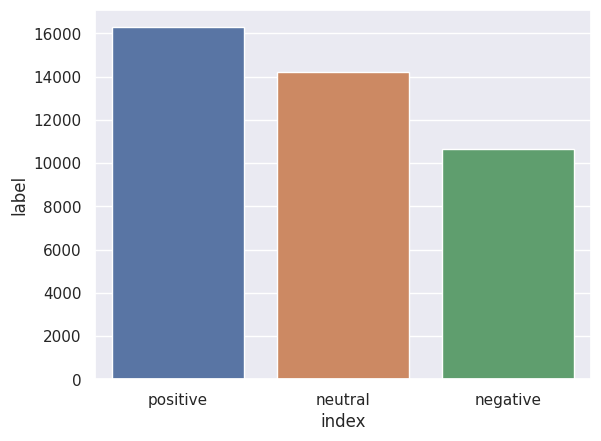

In [ ]:
sns.barplot(x='index', y='label', data=counts_df)

In [ ]:
data_agg = data[['user_name', 'date', 'label']].groupby(['date', 'label']).count().reset_index()
data_agg
data_agg.columns = ['date', 'label', 'counts']

In [ ]:
px.line(data_agg, x='date', y='counts', color='label', title='Daily Tweet Sentiment')

In [ ]:
from wordcloud import wordcloud

In [ ]:
mask_pos = data['label'] == 'positive'
positive_texts = data.loc[mask_pos, ['text']]

mask_neu = data['label'] == 'neutral'
neutral_texts = data.loc[mask_neu, ['text']]

mask_neg = data['label'] == 'negative'
negative_texts = data.loc[mask_neg, ['text']]

In [ ]:
pos_text = ' '.join(text for text in positive_texts.text)

In [ ]:
wordcloud = WordCloud(width=800,
                      height=400,
                      max_words=100,
                      max_font_size=50,
                      background_color='white').generate(pos_text)

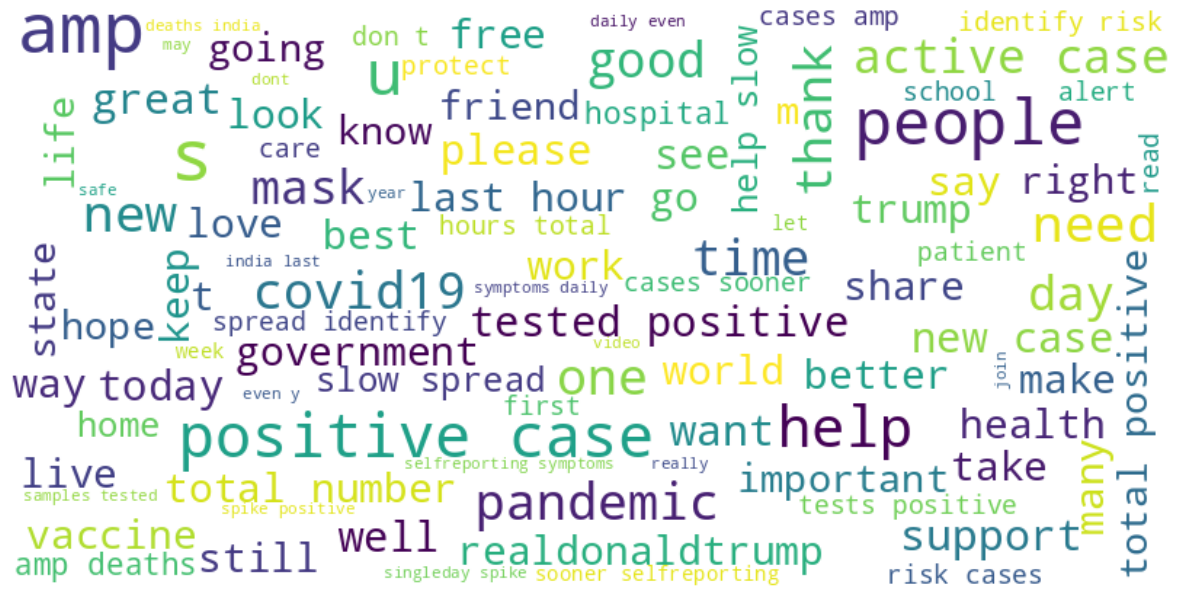

In [ ]:
plt.figure(figsize=(15,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
